<a href="https://colab.research.google.com/github/nikxianer/Learning-python/blob/main/Pr1_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Let's go!

I will work with data about [Pokemons]("https://www.kaggle.com/datasets/abcsds/pokemon"). 

In this file:
- Installation from Kaggle
- Simple operation
- Simple visualization
- Statistics (correlation plot, chi-square, t-test)

# Installation

First of all, let's connect to Kaggle to download dataset.

In [1]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as stats
import opendatasets as od

In [3]:
od.download(
    "https://www.kaggle.com/datasets/abcsds/pokemon")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nikxianercom
Your Kaggle Key: ··········


100%|██████████| 14.9k/14.9k [00:00<00:00, 7.18MB/s]

In [82]:
# reading the CSV file
df = pd.read_csv("/content/pokemon/Pokemon.csv")

In [5]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [6]:
print(f'Well, well, well, what\'s going on? {df.shape[0]} strings and {df.shape[1]} columns in a dataset') #*

Well, well, well, what's going on? 800 strings and 13 columns in a dataset


*`f` is formatted string literals ([more](https://docs.python.org/3.6/reference/lexical_analysis.html#formatted-string-literals))

Let's take a look into format of a data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


# Simple operations 

Select one column

In [10]:
# Select the column 
defense = df['Defense']
# Dot notation
#defense = df.Defense

# Display the results
print(defense)

0       49
1       63
2       83
3      123
4       43
      ... 
795    150
796    110
797     60
798     60
799    120
Name: Defense, Length: 800, dtype: int64


Playing with data comparison & exploring dataset

In [16]:
# Select the pokemons where Defense is greater than 1002
greater_than_100 = df[df.Defense > 100]
print(greater_than_100)


       #                       Name  Type 1  Type 2  Total   HP  Attack  \
3      3      VenusaurMega Venusaur   Grass  Poison    625   80     100   
7      6  CharizardMega Charizard X    Fire  Dragon    634   78     130   
12     9    BlastoiseMega Blastoise   Water     NaN    630   79     103   
33    28                  Sandslash  Ground     NaN    450   75     100   
81    75                   Graveler    Rock  Ground    390   55      95   
..   ...                        ...     ...     ...    ...  ...     ...   
789  713                    Avalugg     Ice     NaN    514   95     117   
794  718           Zygarde50% Forme  Dragon  Ground    600  108     100   
795  719                    Diancie    Rock   Fairy    600   50     100   
796  719        DiancieMega Diancie    Rock   Fairy    700   50     160   
799  721                  Volcanion    Fire   Water    600   80     110   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
3        123      122      120     8

In [15]:
# Select the pokemons whose Type is equal to Fire
pokemon_fire = df[df['Type 1'] == 'Fire'].head(5)
print(pokemon_fire)


   #                       Name Type 1  Type 2  Total  HP  Attack  Defense  \
4  4                 Charmander   Fire     NaN    309  39      52       43   
5  5                 Charmeleon   Fire     NaN    405  58      64       58   
6  6                  Charizard   Fire  Flying    534  78      84       78   
7  6  CharizardMega Charizard X   Fire  Dragon    634  78     130      111   
8  6  CharizardMega Charizard Y   Fire  Flying    634  78     104       78   

   Sp. Atk  Sp. Def  Speed  Generation  Legendary  
4       60       50     65           1      False  
5       80       65     80           1      False  
6      109       85    100           1      False  
7      130       85    100           1      False  
8      159      115    100           1      False  


In [13]:
# Select all data for pokemons whose Type 2 is not equal to Poison
not_poison = df[df['Type 2'] != 'Poison']
print(not_poison)

       #                       Name   Type 1  Type 2  Total  HP  Attack  \
4      4                 Charmander     Fire     NaN    309  39      52   
5      5                 Charmeleon     Fire     NaN    405  58      64   
6      6                  Charizard     Fire  Flying    534  78      84   
7      6  CharizardMega Charizard X     Fire  Dragon    634  78     130   
8      6  CharizardMega Charizard Y     Fire  Flying    634  78     104   
..   ...                        ...      ...     ...    ...  ..     ...   
795  719                    Diancie     Rock   Fairy    600  50     100   
796  719        DiancieMega Diancie     Rock   Fairy    700  50     160   
797  720        HoopaHoopa Confined  Psychic   Ghost    600  80     110   
798  720         HoopaHoopa Unbound  Psychic    Dark    680  80     160   
799  721                  Volcanion     Fire   Water    600  80     110   

     Defense  Sp. Atk  Sp. Def  Speed  Generation  Legendary  
4         43       60       50     6

# Data Visualization

In [26]:
from matplotlib import pyplot as plt
#View all styles by typing print(plt.style.available) in the console.
plt.style.use('ggplot')

### Scatter plot

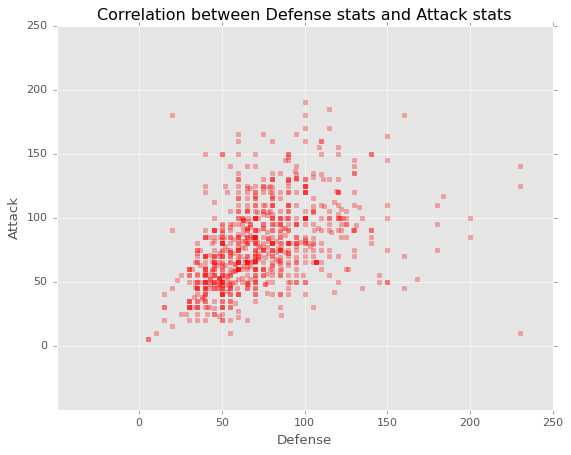

In [71]:
# Create a scatter plot
plt.scatter(df.Defense, df.Attack,
           color='red',
           marker='s',
           alpha=0.3)

# Add labels
plt.title('Correlation between Defense stats and Attack stats')
plt.ylabel('Attack')
plt.xlabel('Defense')

# Definition of tick_val and tick_lab
tick_val = [0, 50, 100, 150, 200, 250]
tick_lab = ['0', '50', '100', '150', '200', '250']

# Adapt the ticks on the x-axis
plt.xticks(tick_val, tick_lab)
plt.yticks(tick_val, tick_lab)

# Display the plot
plt.show()

### Bar plot

In [55]:
import pandas as pd


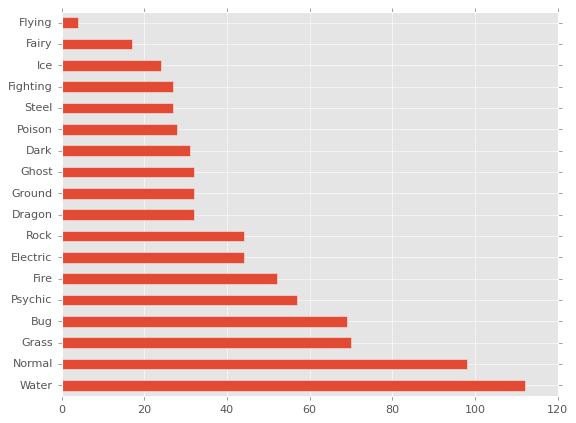

In [61]:
# Create a bar plot from the DataFrame hours
df['Type 1'].value_counts(sort = True).plot(kind='barh')

### Histogram

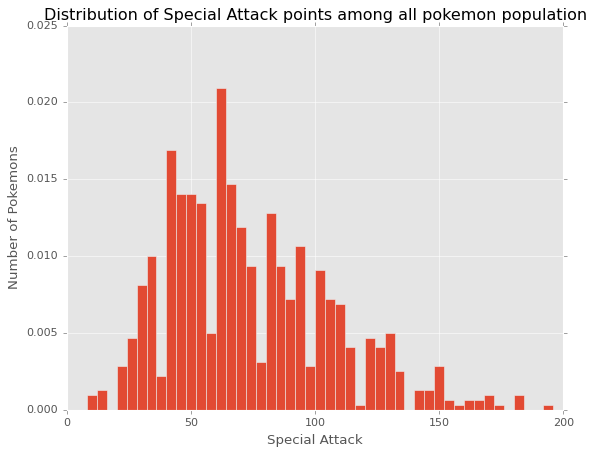

<Figure size 640x480 with 0 Axes>

In [70]:
# Create a histogram of the column weight from the DataFrame puppies
plt.hist(df['Sp. Atk'], bins=50, 
         range=(0, 200), # start, end
         density=True) # normalize to 1

# Add labels
plt.xlabel('Special Attack')
plt.ylabel('Number of Pokemons')
plt.title('Distribution of Special Attack points among all pokemon population')

# Display
plt.show()
plt.clf()

# Statistics

In [83]:
df.isnull().sum() #386 NA in Type 2 column

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [84]:
df.dropna(inplace = True)

To change datatypes

In [ ]:
df.var1 = df.var1.astype(object)
df.var2 = pd.to_numeric(df.var2, errors='coerce') #if ‘coerce’, then invalid parsing will be set as NaN.

# Correlation & plot



In [85]:
df.corr()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,1.000000,0.128957,0.109955,0.105918,0.090547,0.065748,0.084785,0.068507,0.983625,0.201582
Total,0.128957,1.000000,0.669066,0.754465,0.598596,0.746982,0.691391,0.561656,0.063254,0.511054
HP,0.109955,0.669066,1.000000,0.518707,0.248920,0.456355,0.328665,0.271853,0.069728,0.368597
Attack,0.105918,0.754465,0.518707,1.000000,0.401001,0.408570,0.257964,0.403546,0.058433,0.359763
Defense,0.090547,0.598596,0.248920,0.401001,1.000000,0.196778,0.528286,-0.030993,0.040160,0.199898
Sp. Atk,0.065748,0.746982,0.456355,0.408570,0.196778,1.000000,0.480027,0.435450,0.018942,0.474865
Sp. Def,0.084785,0.691391,0.328665,0.257964,0.528286,0.480027,1.000000,0.208259,0.036356,0.354490
Speed,0.068507,0.561656,0.271853,0.403546,-0.030993,0.435450,0.208259,1.000000,0.039029,0.305780
Generation,0.983625,0.063254,0.069728,0.058433,0.040160,0.018942,0.036356,0.039029,1.000000,0.130808
Legendary,0.201582,0.511054,0.368597,0.359763,0.199898,0.474865,0.354490,0.305780,0.130808,1.000000


Int64Index([  0,   1,   2,   3,   6,   7,   8,  15,  16,  17,
            ...
            787, 790, 791, 793, 794, 795, 796, 797, 798, 799],
           dtype='int64', length=414)

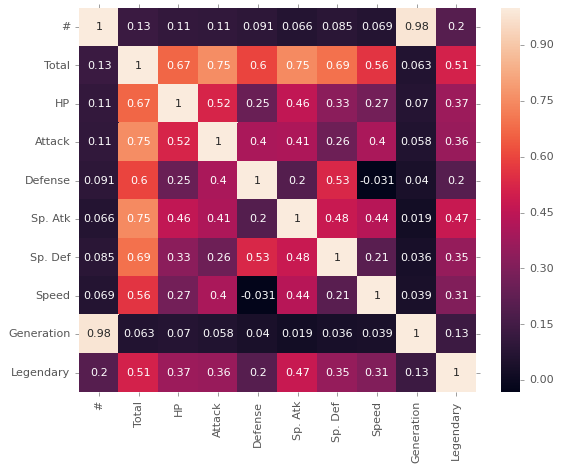

In [88]:
import seaborn as sns

df_corr = df.corr()
df_corr_top = df_corr.index
sns.heatmap(df[df_corr_top].corr(), annot=True)

In [89]:
# Compute correlation matrix: corr_mat
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient 
df_att = pearson_r(df.Defense, df.Attack)

# Print the result
print(df_att)

0.40100101240740643


In [92]:
#scipy.stats.pearsonr()

TypeError: ignored

# Chi-square

In [97]:
# Create a table of cross-tabulations
table = pd.crosstab(df['Type 2'],df['Legendary'])
print(table)

# Perform the Fisher exact test
#fisher = stats.fisher_exact(table, alternative='two-sided')
#print(fisher)

# Is the result significant?
#alpha = 0.05
#if fisher[1] < alpha:
    #print("Proportions  differ significantly")
#else:
    #print("No significant difference in proportions found")

Legendary  False  True
Type 2                
Bug            3     0
Dark          19     1
Dragon        14     4
Electric       5     1
Fairy         21     2
Fighting      22     4
Fire           9     3
Flying        84    13
Ghost         13     1
Grass         25     0
Ground        34     1
Ice           11     3
Normal         4     0
Poison        34     0
Psychic       28     5
Rock          14     0
Steel         21     1
Water         13     1


ValueError: ignored

# T-test

In [101]:
# Create two arrays
array1 = df[df['Type 1'] == "Fire"].Attack
array2 = df[df['Type 1'] == "Grass"].Attack

# Perform the two-sample t-test
t_result= stats.ttest_ind(array1, array2)
print(t_result)

# Test significance
alpha= 0.05
if (t_result[1] < alpha):
    print("Fire pokemons and Grass have different mean values")
else: print("No significant difference found")

Ttest_indResult(statistic=2.0023531974190556, pvalue=0.049849720292165445)
Fire pokemons and Grass have different mean values


One-sample T-test

In [102]:
Sample_A=[66.1, 69.8,67.7,69.6,71.1]
# Perform t-test and print result

t_result=stats.ttest_1samp(Sample_A, 65)
print(t_result)

# Test significance
alpha= 0.05
if (t_result[1] < alpha):
    print("mean value of Sample A differs from given value")
else:
	print("No significant difference found")
 
 #this sample isn't significantly different from 65 kg.


Ttest_1sampResult(statistic=4.397165403622582, pvalue=0.01171701570294137)
mean value of Sample A differs from given value
